# Correlation between single lap residuals and estimation errors

Goal of this experiment is to find out whether there is a correlation between the residuals of the local all pass minimization and the error in the estimated flow at the corresposting location.

In [45]:
using LAP_julia, Images, ImageDistances, TimerOutputs, StatsBase, Statistics
import LAP_julia: vec_len, sparse_lap, single_lap_at_points
using ImageFiltering: Fill, KernelFactors.gaussian, centered, kernelfactors, imfilter!, padarray, Pad
using LinearAlgebra: qr
using LAP_julia: window_sum3_at_inds!, multi_mat_div_qr, addpoints, to_lin_index

# gather data

!local version of sparse_lap! !local version of single_lap_at_points! 1
!local version of sparse_lap! !local version of single_lap_at_points! 2
!local version of sparse_lap! !local version of single_lap_at_points! 3
!local version of sparse_lap! !local version of single_lap_at_points! 4
!local version of sparse_lap! !local version of single_lap_at_points! 5
!local version of sparse_lap! !local version of single_lap_at_points! 6
!local version of sparse_lap! !local version of single_lap_at_points! 7
!local version of sparse_lap! !local version of single_lap_at_points! 8
!local version of sparse_lap! !local version of single_lap_at_points! 9
!local version of sparse_lap! !local version of single_lap_at_points! 10
!local version of sparse_lap! !local version of single_lap_at_points! 11
!local version of sparse_lap! !local version of single_lap_at_points! 12
!local version of sparse_lap! !local version of single_lap_at_points! 13
!local version of sparse_lap! !local version of single_lap_a

!local version of sparse_lap! !local version of single_lap_at_points! 223
!local version of sparse_lap! !local version of single_lap_at_points! 224
!local version of sparse_lap! !local version of single_lap_at_points! 225
!local version of sparse_lap! !local version of single_lap_at_points! 226
!local version of sparse_lap! !local version of single_lap_at_points! 227
!local version of sparse_lap! !local version of single_lap_at_points! 228
!local version of sparse_lap! !local version of single_lap_at_points! 229
!local version of sparse_lap! !local version of single_lap_at_points! 230
!local version of sparse_lap! !local version of single_lap_at_points! 231
!local version of sparse_lap! !local version of single_lap_at_points! 232
!local version of sparse_lap! !local version of single_lap_at_points! 233
!local version of sparse_lap! !local version of single_lap_at_points! 234
!local version of sparse_lap! !local version of single_lap_at_points! 235
!local version of sparse_lap! !local v

!local version of sparse_lap! !local version of single_lap_at_points! 443
!local version of sparse_lap! !local version of single_lap_at_points! 444
!local version of sparse_lap! !local version of single_lap_at_points! 445
!local version of sparse_lap! !local version of single_lap_at_points! 446
!local version of sparse_lap! !local version of single_lap_at_points! 447
!local version of sparse_lap! !local version of single_lap_at_points! 448
!local version of sparse_lap! !local version of single_lap_at_points! 449
!local version of sparse_lap! !local version of single_lap_at_points! 450
!local version of sparse_lap! !local version of single_lap_at_points! 451
!local version of sparse_lap! !local version of single_lap_at_points! 452
!local version of sparse_lap! !local version of single_lap_at_points! 453
!local version of sparse_lap! !local version of single_lap_at_points! 454
!local version of sparse_lap! !local version of single_lap_at_points! 455
!local version of sparse_lap! !local v

!local version of sparse_lap! !local version of single_lap_at_points! 663
!local version of sparse_lap! !local version of single_lap_at_points! 664
!local version of sparse_lap! !local version of single_lap_at_points! 665
!local version of sparse_lap! !local version of single_lap_at_points! 666
!local version of sparse_lap! !local version of single_lap_at_points! 667
!local version of sparse_lap! !local version of single_lap_at_points! 668
!local version of sparse_lap! !local version of single_lap_at_points! 669
!local version of sparse_lap! !local version of single_lap_at_points! 670
!local version of sparse_lap! !local version of single_lap_at_points! 671
!local version of sparse_lap! !local version of single_lap_at_points! 672
!local version of sparse_lap! !local version of single_lap_at_points! 673
!local version of sparse_lap! !local version of single_lap_at_points! 674
!local version of sparse_lap! !local version of single_lap_at_points! 675
!local version of sparse_lap! !local v

!local version of sparse_lap! !local version of single_lap_at_points! 883
!local version of sparse_lap! !local version of single_lap_at_points! 884
!local version of sparse_lap! !local version of single_lap_at_points! 885
!local version of sparse_lap! !local version of single_lap_at_points! 886
!local version of sparse_lap! !local version of single_lap_at_points! 887
!local version of sparse_lap! !local version of single_lap_at_points! 888
!local version of sparse_lap! !local version of single_lap_at_points! 889
!local version of sparse_lap! !local version of single_lap_at_points! 890
!local version of sparse_lap! !local version of single_lap_at_points! 891
!local version of sparse_lap! !local version of single_lap_at_points! 892
!local version of sparse_lap! !local version of single_lap_at_points! 893
!local version of sparse_lap! !local version of single_lap_at_points! 894
!local version of sparse_lap! !local version of single_lap_at_points! 895
!local version of sparse_lap! !local v

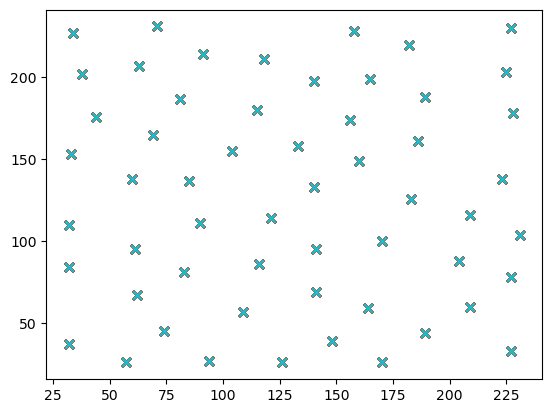

In [44]:
iterations = 1000

errors = []
residuals_arr = []

for k in 1:iterations
    
    img, imgw, flow = gen_init()
    
    timer=TimerOutput("sparse lap");
    flow_est, source_reg, timer, results, (residuals, estim_at_inds, inds) = test_registration_alg(sparse_lap, img, imgw, flow, [25, (51,51)], Dict(:timer => timer), timer=timer, display=false)
    
    push!(errors, vec_len.((map(ind -> flow[ind], inds) .- estim_at_inds)))
    push!(residuals_arr, residuals)
    println(k)
end

# See results

In [72]:

errors_arr = errors

test_funs = [cor, ncc] # same thing as it turns out.
outs = Dict()

for fun in test_funs
    outs[string(fun)] = [fun(errors_arr[k], residuals_arr[k]) for k in 1:length(residuals_arr)]
end

#println(outs["cor"])



# cor
println("*****************************")
println(string(cor))
println("mean: ", mean(outs[string(cor)]))
println("minimum: ", minimum(collect.(transpose.(outs[string(cor)]))))
println("maximum: ", maximum(collect.(transpose.(outs[string(cor)]))))


# cor
println("*****************************")
println(string(ncc))
println("mean: ", mean(outs[string(ncc)]))
println("minimum: ", minimum(outs[string(ncc)]))
println("maximum: ", maximum(outs[string(ncc)]))


*****************************
cor
mean: [0.21949425446649898]
minimum: [-0.17000850000668222]
maximum: [0.529977747070239]
*****************************
ncc
mean: 0.21949425446649903
minimum: -0.17000850000668227
maximum: 0.529977747070239


In [18]:
h = fit(Histogram, nccs)

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -0.2:0.1:0.6
weights: [21, 49, 128, 239, 212, 256, 87, 8]
closed: left
isdensity: false

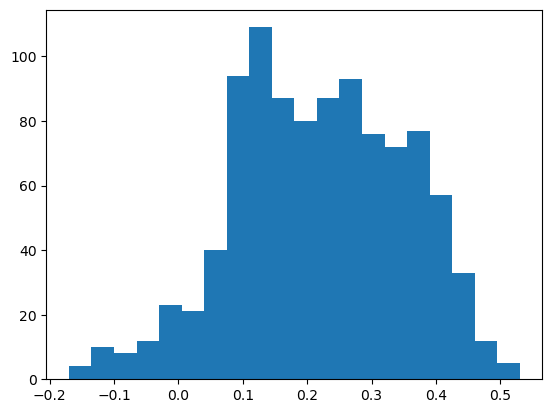

In [71]:
using PyPlot
h = plt.hist(outs[string(ncc)], 20);

# Conclusion

There usually a possitive correlation between the two.

Can it be used? Is the real question.

At the moment it takes long to calculate and as of now I dont see a good way to speed it up by a significant ammount.


# Functions

In [36]:
function sparse_lap(img,
                    imgw,
                    fhs,
                    window_size;
                    spacing::Integer=25,
                    point_count::Integer=100,
                    timer::TimerOutput=TimerOutput("sparse_lap"),
                    new_version=true)
    print("!local version of sparse_lap! ")
    mask = parent(padarray(trues(size(img).-(2*fhs, 2*fhs)), Fill(false, (fhs, fhs), (fhs, fhs))))
    @timeit_debug timer "find edge points" begin
        inds = find_edge_points(img, spacing=spacing, number=point_count, mask=mask)
    end
    @timeit_debug timer "sparse lap" begin
        new_estim_at_inds, err = single_lap_at_points(img, imgw, fhs, window_size, inds, 3, timer=timer)
    end
    if all(isnan, new_estim_at_inds)
        @timeit_debug timer "interpolate flow" begin
            full_new_estim = zeros(size(img)) .* im .+ zeros(size(img))
        end
    else
        @timeit_debug timer "interpolate flow" begin
            full_new_estim = interpolate_flow(new_estim_at_inds, inds, size(img))
        end
    end
    @timeit_debug timer "generate source_reg" begin
        source_reg = warp_img(imgw, real(full_new_estim), imag(full_new_estim))
    end
    return full_new_estim, source_reg, err, new_estim_at_inds, inds
end


function single_lap_at_points(image_1::Image,
                              image_2::Image,
                              filter_half_size::Integer,
                              window,
                              inds::Array{CartesianIndex,1},
                              filter_num::Integer=3;
                              timer::TimerOutput=TimerOutput("Sparse LAP"),
                              display::Bool=false)
    
    print("!local version of single_lap_at_points! ")

    image_size = size(image_1)
    pixel_count = length(image_1)
    ind_count = length(inds)
    filter_size = 2 * filter_half_size + 1

    # Prepare filters:
    # Calculate separable filters from basis:
    sigma = (filter_half_size + 2) / 4
    centered_inds = centered(-filter_half_size:filter_half_size)
    gaus = gaussian(sigma, filter_size)
    gaus_der = gaus .* centered_inds .* (-1)/sigma^2
    gaus_der_flip = reverse(gaus_der, dims=1)

    # prepare 2D filter basis for later use
    basis = similar(image_1, (filter_size, filter_size, filter_num))

    # dif = (points of forward image - points of backward image) for each filter
    dif = similar(image_1, (image_size..., filter_num))

    @timeit_debug timer "filtering" begin
        if filter_num == 3
            # temporary place to store filtered images
            tmp_filtered_1 = fill(NaN, image_size)
            tmp_filtered_2 = fill(NaN, image_size)

            # basis 1 - (gaus, gaus) both forward and backward
            kernf_1 = kernelfactors((gaus, gaus))
            basis[:, :, 1] = broadcast(*, kernf_1...)
            # filt_onebyone!(tmp_filtered_1, image_1, kernf_1, filter_half_size, points)
            # filt_onebyone!(tmp_filtered_2, image_2, kernf_1, filter_half_size, points)
            imfilter!(tmp_filtered_1, image_1, kernf_1, "symmetric")
            imfilter!(tmp_filtered_2, image_2, kernf_1, "symmetric")
            dif[:, :, 1] = tmp_filtered_2 - tmp_filtered_1

            # basis 2 - (gaus, gaus_der_flip) as forward, (gaus, gaus_der) as backward
            kernf_2f = kernelfactors((gaus, gaus_der_flip))
            basis[:, :, 2] = broadcast(*, kernf_2f...)
            # filt_onebyone!(tmp_filtered_1, image_1, kernf_2f, filter_half_size, points)
            imfilter!(tmp_filtered_1, image_1, kernf_2f, "symmetric")
            kernf_2b = kernelfactors((gaus, gaus_der))
            # filt_onebyone!(tmp_filtered_2, image_2, kernf_2b, filter_half_size, points)
            imfilter!(tmp_filtered_2, image_2, kernf_2b, "symmetric")
            dif[:, :, 2] = tmp_filtered_2 - tmp_filtered_1

            # basis 3 - (gaus_der_flip, gaus) as forward, (gaus_der, gaus) as backward
            kernf_3f = kernelfactors((gaus_der_flip, gaus))
            basis[:, :, 3] = broadcast(*, kernf_3f...)
            # filt_onebyone!(tmp_filtered_1, image_1, kernf_3f, filter_half_size, points)
            imfilter!(tmp_filtered_1, image_1, kernf_3f, "symmetric")
            kernf_3b = kernelfactors((gaus_der, gaus))
            # filt_onebyone!(tmp_filtered_2, image_2, kernf_3b, filter_half_size, points)
            imfilter!(tmp_filtered_2, image_2, kernf_3b, "symmetric")
            dif[:, :, 3] = tmp_filtered_2 - tmp_filtered_1
        end
    end # "filtering"

    dif = reshape(dif, (:, filter_num))

    # prepare matrices for linear system of equations
    # A = zeros(filter_num-1, filter_num-1, pixel_count)
    # b = zeros(filter_num-1, pixel_count)
    A = similar(image_1, (filter_num-1, filter_num-1, ind_count))
    b = similar(image_1, (filter_num-1, ind_count))

    @timeit_debug timer "prepare A and b" begin
        # TODO: check whether window_sum_around_points calculates only around points and not on whole window.
        for k in 1:filter_num-1
            for l in k:filter_num-1
                @timeit_debug timer "window sum part 1" begin
                    # @views window_sum_around_points!(A[k, l, :], dif[:, k+1] .* dif[:, l+1], image_size, window, points)
                    @views window_sum3_at_inds!(A[k, l, :], dif[:, k+1] .* dif[:, l+1], image_size, window, inds)
                    A[l, k, :] = A[k, l, :]
                end
            end
            @timeit_debug timer "window sum part 2" begin
                # @views window_sum_around_points!(b[k, :], dif[:, k+1] .* dif[:, 1] .* (-1), image_size, window, points)
                @views window_sum3_at_inds!(b[k, :], dif[:, k+1] .* dif[:, 1] .* (-1), image_size, window, inds)
            end
        end
    end # "prepare A and b"

    # Perform Gauss elimination on all pixels in parallel:
    # coeffs will be of shape: pixel_count, filter_num-1
    @timeit_debug timer "multi mat div" begin
        @views coeffs = multi_mat_div_qr(A, b)
    end

    # adding ones so that all base filters have their coefficients even the first one
    all_coeffs = [ones(ind_count) coeffs]

    k = (-filter_half_size:filter_half_size)

    # Get the displacement vector field from the filters
    @timeit_debug timer "calculate flow" begin
        u_est_at_inds = similar(image_1, ComplexF64, ind_count)
        @views u_est_at_inds[:] = 2 .* ((im .* (.-1 .* all_coeffs[:, 3]) ./ all_coeffs[:, 1]) .+ ((.-1 .* all_coeffs[:, 2]) ./ all_coeffs[:, 1]));
    end # "calculate flow"

    # dont use estimations whose displacement is larger than the filter_half_size

    # u_est_at_inds[(real(u_est_at_inds).^2 .+ imag(u_est_at_inds).^2) .> filter_half_size^2] .= NaN .+ NaN .* 1im;
    # println(u_est_at_inds[(real(u_est_at_inds).^2 .+ imag(u_est_at_inds).^2) .> filter_half_size^2],
    #         inds[(real(u_est_at_inds).^2 .+ imag(u_est_at_inds).^2) .> filter_half_size^2])
    # println(count((real(u_est_at_inds).^2 .+ imag(u_est_at_inds).^2) .> filter_half_size^2))

    addpoints(inds[(real(u_est_at_inds).^2 .+ imag(u_est_at_inds).^2) .> filter_half_size^2])
    addpoints(inds[.!((real(u_est_at_inds).^2 .+ imag(u_est_at_inds).^2) .> filter_half_size^2)])

    err = sum(all_coeffs .* dif[map(x -> to_lin_index(x, image_size), inds), :], dims=2)

    dif = reshape(dif, (image_size..., filter_num))

    window = (5,5)
    whs = round.(Int64, (window.-(1,1))./2)
    shift = CartesianIndex(whs)

    @timeit_debug timer "calc residual" begin
        for (k, ind) in enumerate(inds)
            err[k] = sum(dif[:,:, 1][ind-shift:ind+shift].^2 .+
                        (dif[:,:, 2][ind-shift:ind+shift] .* all_coeffs[k, 2]) .^2 .+
                        (dif[:,:, 3][ind-shift:ind+shift] .* all_coeffs[k, 3]) .^2)
        end
    end

    return u_est_at_inds, err

end

single_lap_at_points (generic function with 2 methods)